## US Visa Prediction Project
### Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## Import CSV data as Panadas DataFrame

## Read new data set

In [2]:
df=pd.read_excel("porosity_file.xlsx")

In [3]:
df.head()

,IMAGE DERIVED DENSITY,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,BEST THERMAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS,,.1,TOTAL POROSITY
0,2.5059,10.6431,18.4555,0.1919,3.8568,0.0,1.0,1.0,0,NaN,NaN,0.1300
1,2.5460,10.7011,18.8648,0.1862,4.9163,0.0,1.0,1.0,0,NaN,NaN,0.1111
2,2.5642,10.7012,19.3160,0.1830,5.7882,0.0,1.0,1.0,0,NaN,NaN,0.1015
3,2.5808,10.6773,19.6845,0.1739,6.8120,0.0,1.0,1.0,0,NaN,NaN,0.0927
4,2.5632,10.6162,19.4390,0.1547,5.4189,0.0,1.0,1.0,0,NaN,NaN,0.1053


## Shape of data set

In [4]:
df.shape

(1318, 12)

## Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

## Check for missing values

In [5]:
df.isna().sum()

IMAGE DERIVED DENSITY                                   0
BEST CALIPER,AVERAGE DIAMETER                           0
IMAGE DERIVED PHOTOELECTRIC FACTOR                      0
BEST THERMAL POROSITY                                   0
RESISTIVITY OF WATER FILLED FORMATION                   0
RELATIVE PERMEABILITY TO HYDROCARBON                    0
RELATIVE PERMEABILITY TO WATER                          0
WATER CUT                                               0
MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS       0
                                                     1318
 .1                                                  1318
TOTAL POROSITY                                          0
dtype: int64

##### There two completely empty columns

In [6]:
df = df.dropna(axis=1, how='all')

**Removed columns which was fully empty**

In [7]:
df.head()

,IMAGE DERIVED DENSITY,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,BEST THERMAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS,TOTAL POROSITY
0,2.5059,10.6431,18.4555,0.1919,3.8568,0.0,1.0,1.0,0,0.1300
1,2.5460,10.7011,18.8648,0.1862,4.9163,0.0,1.0,1.0,0,0.1111
2,2.5642,10.7012,19.3160,0.1830,5.7882,0.0,1.0,1.0,0,0.1015
3,2.5808,10.6773,19.6845,0.1739,6.8120,0.0,1.0,1.0,0,0.0927
4,2.5632,10.6162,19.4390,0.1547,5.4189,0.0,1.0,1.0,0,0.1053


## Check for duplicates

In [8]:
df.duplicated().sum()


0

***There is no duplicates***

### Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   IMAGE DERIVED DENSITY                              1318 non-null   float64
 1   BEST CALIPER,AVERAGE DIAMETER                      1318 non-null   float64
 2   IMAGE DERIVED PHOTOELECTRIC FACTOR                 1318 non-null   float64
 3   BEST THERMAL POROSITY                              1318 non-null   float64
 4   RESISTIVITY OF WATER FILLED FORMATION              1318 non-null   float64
 5   RELATIVE PERMEABILITY TO HYDROCARBON               1318 non-null   float64
 6   RELATIVE PERMEABILITY TO WATER                     1318 non-null   float64
 7   WATER CUT                                          1318 non-null   float64
 8   MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS  1318 non-null   int64  
 9   TOTAL PO

### Check number of unique values

In [10]:
df.nunique(
    
)

IMAGE DERIVED DENSITY                                 921
BEST CALIPER,AVERAGE DIAMETER                         782
IMAGE DERIVED PHOTOELECTRIC FACTOR                   1215
BEST THERMAL POROSITY                                 807
RESISTIVITY OF WATER FILLED FORMATION                1310
RELATIVE PERMEABILITY TO HYDROCARBON                   33
RELATIVE PERMEABILITY TO WATER                         59
WATER CUT                                              20
MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS       1
TOTAL POROSITY                                        761
dtype: int64

### Check statistics of data set

In [11]:
df.describe()

,IMAGE DERIVED DENSITY,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,BEST THERMAL POROSITY,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS,TOTAL POROSITY
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.0,1318.000000
mean,2.544105,8.600562,5.338494,0.110875,5.684267,0.000252,0.982588,-2.035698,0.0,0.098035
std,0.050237,0.338883,1.437792,0.035528,3.486413,0.002351,0.100465,55.040913,0.0,0.030676
min,2.383600,8.458700,4.295600,0.050300,1.799000,0.000000,0.000000,-999.250000,0.0,0.035100
25%,2.503725,8.513525,4.965000,0.078000,2.950325,0.000000,1.000000,1.000000,0.0,0.070900
50%,2.546150,8.529600,5.137200,0.109350,4.620850,0.000000,1.000000,1.000000,0.0,0.095600
75%,2.588200,8.549875,5.258475,0.140375,7.631775,0.000000,1.000000,1.000000,0.0,0.124150
max,2.645700,10.701200,19.684500,0.244900,26.157700,0.037000,1.000000,1.000000,0.0,0.195400


## Exploring Data

In [12]:
## Define numerical and ctegorical data
numerical_features=[features for features in df.columns if df[features].dtype != "O" ]
categorical_features=[features for features in df.columns if df[features].dtype=="O"]

print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 10 numerical features : ['IMAGE DERIVED DENSITY', 'BEST CALIPER,AVERAGE DIAMETER', 'IMAGE DERIVED PHOTOELECTRIC FACTOR', 'BEST THERMAL POROSITY', 'RESISTIVITY OF WATER FILLED FORMATION', 'RELATIVE PERMEABILITY TO HYDROCARBON', 'RELATIVE PERMEABILITY TO WATER', 'WATER CUT', 'MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS', 'TOTAL POROSITY']
We have 0 categorical features : []



## Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
Other Type of Analysis are

* Bivariate Analysis: The analysis of two variables.
* Multivariate Analysis: The analysis of two or more variables.

## Numerical Features

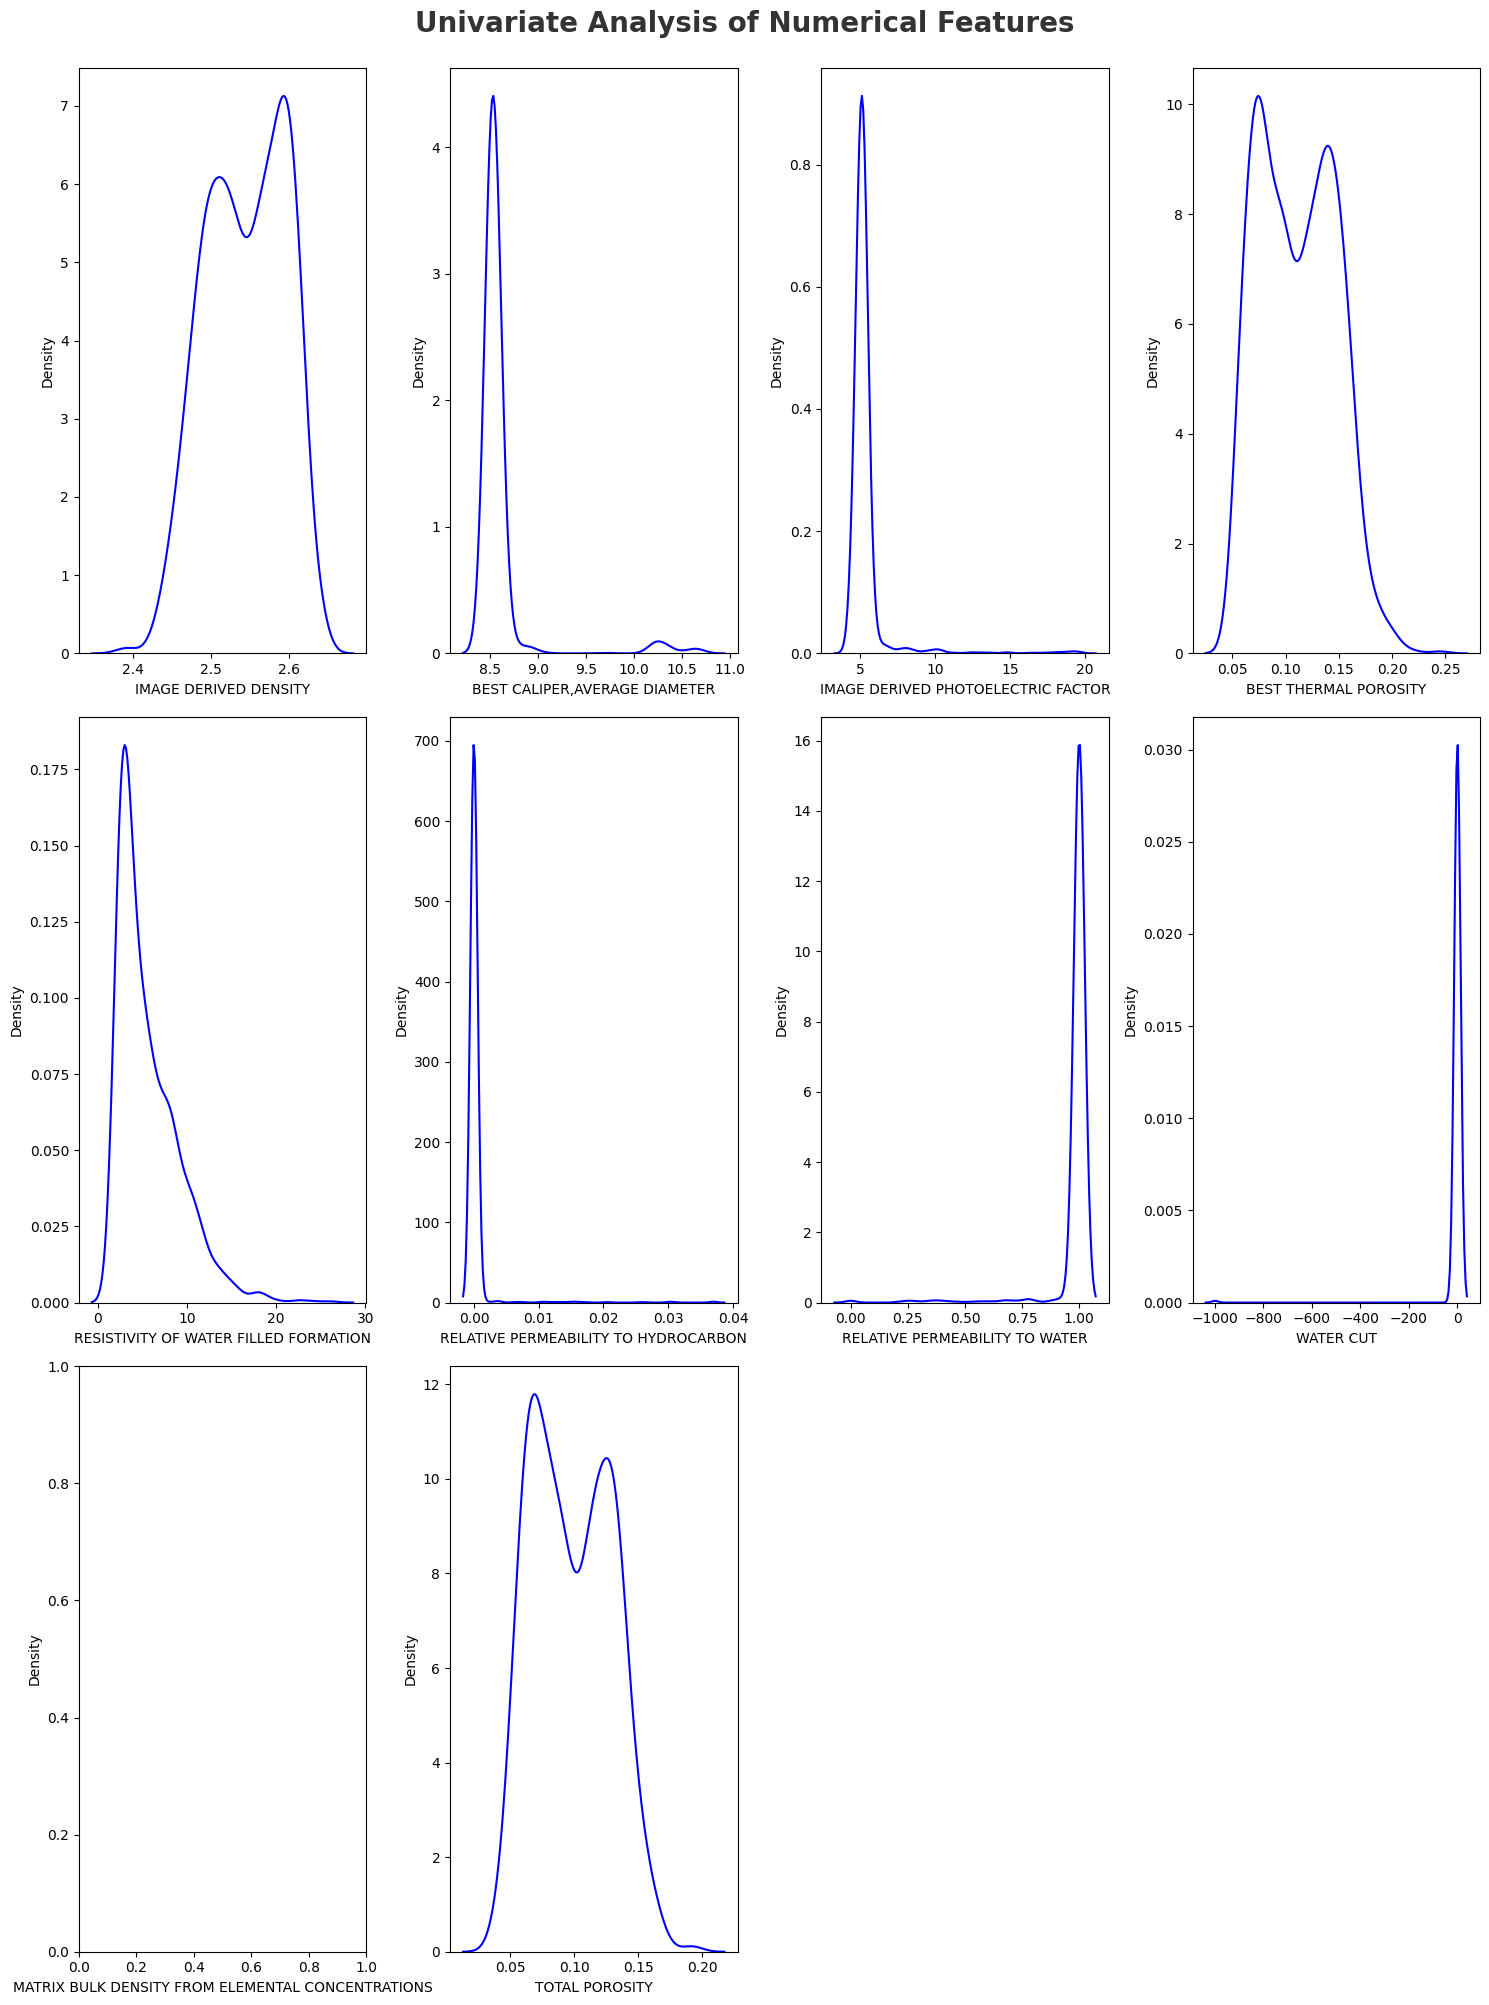

In [13]:
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)


for i in  range(0,len(numerical_features)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(data=df[numerical_features[i]],color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


In [14]:
df['RELATIVE PERMEABILITY TO HYDROCARBON'].unique()

array([0.    , 0.0003, 0.003 , 0.011 , 0.0013, 0.0133, 0.037 , 0.0205,
       0.0006, 0.001 , 0.0011, 0.0153, 0.0122, 0.0306, 0.004 , 0.0008,
       0.0012, 0.0158, 0.0301, 0.0104, 0.0074, 0.0171, 0.0004, 0.0002,
       0.0037, 0.0007, 0.0258, 0.0369, 0.0016, 0.0001, 0.0036, 0.0145,
       0.0064])

In [15]:
df['RESISTIVITY OF WATER FILLED FORMATION'].nunique()

1310

In [16]:
df['RELATIVE PERMEABILITY TO WATER'].unique()

array([1.    , 0.7876, 0.5677, 0.9278, 0.3743, 0.8889, 0.681 , 0.4073,
       0.2616, 0.3579, 0.7613, 0.9548, 0.9215, 0.9804, 0.6623, 0.7797,
       0.6873, 0.3533, 0.3984, 0.257 , 0.5589, 0.9968, 0.7246, 0.6747,
       0.9609, 0.3174, 0.22  , 0.3851, 0.7627, 0.4289, 0.2844, 0.7277,
       0.779 , 0.9849, 0.7959, 0.9456, 0.6118, 0.4863, 0.958 , 0.7095,
       0.2586, 0.2191, 0.7726, 0.6091, 0.8228, 0.8781, 0.8978, 0.    ,
       0.9513, 0.925 , 0.9212, 0.9358, 0.5293, 0.6563, 0.3387, 0.453 ,
       0.9097, 0.872 , 0.7776])

In [17]:
df['WATER CUT'].unique()

array([ 1.0000e+00,  9.9980e-01,  9.9860e-01,  9.9990e-01,  9.9850e-01,
        9.9360e-01,  9.9740e-01,  9.9800e-01,  9.9450e-01,  9.9970e-01,
        9.9770e-01,  9.9380e-01,  9.9880e-01,  9.9920e-01,  9.9730e-01,
        9.9550e-01,  9.9240e-01, -9.9925e+02,  9.9820e-01,  9.9940e-01])

* `Relative permeability to Hydrocarbon` is left skewed as most of the values range from 0.0001 t0 0.0037 wich means hydrocarbon permeability is low in presence of other phase  of liquid.This suggests that the reservoir rock does not easily permit hydrocarbon flow under these conditions, which might be due to water saturation or the specific properties of the rock.

* `Relative Permeability to water` is right skewed Many values are high, indicating that the rock is highly permeable to water, allowing it to flow relatively easily. This could suggest high water production potential in areas of the reservoir where these values are measured.

In [18]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numerical_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 2 discrete features : ['WATER CUT', 'MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS']

We have 8 continuous_features : ['IMAGE DERIVED DENSITY', 'BEST CALIPER,AVERAGE DIAMETER', 'IMAGE DERIVED PHOTOELECTRIC FACTOR', 'BEST THERMAL POROSITY', 'RESISTIVITY OF WATER FILLED FORMATION', 'RELATIVE PERMEABILITY TO HYDROCARBON', 'RELATIVE PERMEABILITY TO WATER', 'TOTAL POROSITY']


In [19]:
df.columns

Index(['IMAGE DERIVED DENSITY', 'BEST CALIPER,AVERAGE DIAMETER',
       'IMAGE DERIVED PHOTOELECTRIC FACTOR', 'BEST THERMAL POROSITY',
       'RESISTIVITY OF WATER FILLED FORMATION',
       'RELATIVE PERMEABILITY TO HYDROCARBON',
       'RELATIVE PERMEABILITY TO WATER', 'WATER CUT',
       'MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS', 'TOTAL POROSITY'],
      dtype='object')

In [21]:
df=df.drop(['BEST THERMAL POROSITY','IMAGE DERIVED DENSITY'],axis=1)

In [23]:
df.shape

(1318, 8)

In [24]:
x=['BEST CALIPER,AVERAGE DIAMETER',                        
'IMAGE DERIVED PHOTOELECTRIC FACTOR',                   
'TOTAL POROSITY',                         
'RESISTIVITY OF WATER FILLED FORMATION',                
'RELATIVE PERMEABILITY TO HYDROCARBON',                 
'RELATIVE PERMEABILITY TO WATER',                       
'WATER CUT',                                           
'MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS']
type(x)

list

In [27]:
c=0
for i in x:
    print(x)
    for j in range(0,len(df[i])):
        if df[i][j]==-999.25:
            c+=1
print(c)

['BEST CALIPER,AVERAGE DIAMETER', 'IMAGE DERIVED PHOTOELECTRIC FACTOR', 'TOTAL POROSITY', 'RESISTIVITY OF WATER FILLED FORMATION', 'RELATIVE PERMEABILITY TO HYDROCARBON', 'RELATIVE PERMEABILITY TO WATER', 'WATER CUT', 'MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS']
['BEST CALIPER,AVERAGE DIAMETER', 'IMAGE DERIVED PHOTOELECTRIC FACTOR', 'TOTAL POROSITY', 'RESISTIVITY OF WATER FILLED FORMATION', 'RELATIVE PERMEABILITY TO HYDROCARBON', 'RELATIVE PERMEABILITY TO WATER', 'WATER CUT', 'MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS']
['BEST CALIPER,AVERAGE DIAMETER', 'IMAGE DERIVED PHOTOELECTRIC FACTOR', 'TOTAL POROSITY', 'RESISTIVITY OF WATER FILLED FORMATION', 'RELATIVE PERMEABILITY TO HYDROCARBON', 'RELATIVE PERMEABILITY TO WATER', 'WATER CUT', 'MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS']
['BEST CALIPER,AVERAGE DIAMETER', 'IMAGE DERIVED PHOTOELECTRIC FACTOR', 'TOTAL POROSITY', 'RESISTIVITY OF WATER FILLED FORMATION', 'RELATIVE PERMEABILITY TO HYDROCARBON', 'RELATIVE PERMEA

In [28]:
df.isna().sum()

BEST CALIPER,AVERAGE DIAMETER                        0
IMAGE DERIVED PHOTOELECTRIC FACTOR                   0
RESISTIVITY OF WATER FILLED FORMATION                0
RELATIVE PERMEABILITY TO HYDROCARBON                 0
RELATIVE PERMEABILITY TO WATER                       0
WATER CUT                                            0
MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS    0
TOTAL POROSITY                                       0
dtype: int64

In [29]:
df=df.replace(-999.25,np.NaN)
df.head()

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS,TOTAL POROSITY
0,10.6431,18.4555,3.8568,0.0,1.0,1.0,0,0.1300
1,10.7011,18.8648,4.9163,0.0,1.0,1.0,0,0.1111
2,10.7012,19.3160,5.7882,0.0,1.0,1.0,0,0.1015
3,10.6773,19.6845,6.8120,0.0,1.0,1.0,0,0.0927
4,10.6162,19.4390,5.4189,0.0,1.0,1.0,0,0.1053


In [30]:
df=df.dropna()
df.shape

(1314, 8)

In [31]:
df.mean()

BEST CALIPER,AVERAGE DIAMETER                        8.600854
IMAGE DERIVED PHOTOELECTRIC FACTOR                   5.338701
RESISTIVITY OF WATER FILLED FORMATION                5.653717
RELATIVE PERMEABILITY TO HYDROCARBON                 0.000253
RELATIVE PERMEABILITY TO WATER                       0.985579
WATER CUT                                            0.999962
MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS    0.000000
TOTAL POROSITY                                       0.098191
dtype: float64

In [32]:
df.describe()

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS,TOTAL POROSITY
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.0,1314.000000
mean,8.600854,5.338701,5.653717,0.000253,0.985579,0.999962,0.0,0.098191
std,0.339357,1.439975,3.445294,0.002354,0.084698,0.000411,0.0,0.030591
min,8.458700,4.295600,1.799000,0.000000,0.219100,0.992400,0.0,0.035100
25%,8.513625,4.964000,2.948050,0.000000,1.000000,1.000000,0.0,0.071025
50%,8.529800,5.136000,4.613600,0.000000,1.000000,1.000000,0.0,0.095850
75%,8.549975,5.256650,7.615275,0.000000,1.000000,1.000000,0.0,0.124350
max,10.701200,19.684500,26.157700,0.037000,1.000000,1.000000,0.0,0.195400


In [33]:
Y=df["TOTAL POROSITY"]
Y.head()

0    0.1300
1    0.1111
2    0.1015
3    0.0927
4    0.1053
Name: TOTAL POROSITY, dtype: float64

In [34]:
X=df.drop("TOTAL POROSITY",axis=1)
X.head()

,"BEST CALIPER,AVERAGE DIAMETER",IMAGE DERIVED PHOTOELECTRIC FACTOR,RESISTIVITY OF WATER FILLED FORMATION,RELATIVE PERMEABILITY TO HYDROCARBON,RELATIVE PERMEABILITY TO WATER,WATER CUT,MATRIX BULK DENSITY FROM ELEMENTAL CONCENTRATIONS
0,10.6431,18.4555,3.8568,0.0,1.0,1.0,0
1,10.7011,18.8648,4.9163,0.0,1.0,1.0,0
2,10.7012,19.3160,5.7882,0.0,1.0,1.0,0
3,10.6773,19.6845,6.8120,0.0,1.0,1.0,0
4,10.6162,19.4390,5.4189,0.0,1.0,1.0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
X_train.shape

(1051, 7)

In [38]:
Y_train.shape

(1051,)

In [39]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings

## Create Evaluvate model to check the metrics after the model trainig

In [40]:
def evaluvate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)

    return mae,rmse,r2_square

In [48]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regression":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()

}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)


    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    ##Evaluvate model
    model_train_mae,model_train_rmse,model_train_r2=evaluvate_model(Y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluvate_model(Y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0135
- Mean Absolute Error: 0.0105
- R2 Score: 0.8034
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0141
- Mean Absolute Error: 0.0105
- R2 Score: 0.7954


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.0304
- Mean Absolute Error: 0.0265
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0313
- Mean Absolute Error: 0.0270
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0135
- Mean Absolute Error: 0.0105
- R2 Score: 0.8028
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0143
- Mean Absolute Error: 0.0107
- R2 Score: 0.7919


K-Neighbors Regression
Model performance for Training set
- Root Mean Squared Error: 0.0032
- Mean Absolute Error: 0.0019
- R2 Score: 0.9886
---------------------

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.988034
7,CatBoost Regressor,0.987555
5,Random Forest Regressor,0.986819
4,Decision Tree Regressor,0.980498
3,K-Neighbors Regression,0.971951
8,AdaBoost Regressor,0.966897
0,Linear Regression,0.795395
2,Ridge,0.791903
1,Lasso,-0.000009


## XGBRegressor

In [55]:
XgB=XGBRegressor()
XgB_trained=XgB.fit(X_train,Y_train)
y_pred=XgB.predict(X_test)
r2_sqaure=r2_score(Y_test,y_pred)
print(r2_sqaure)

0.9880340360792716


## Plot y_pred and y_test


Text(0, 0.5, 'Predicted')

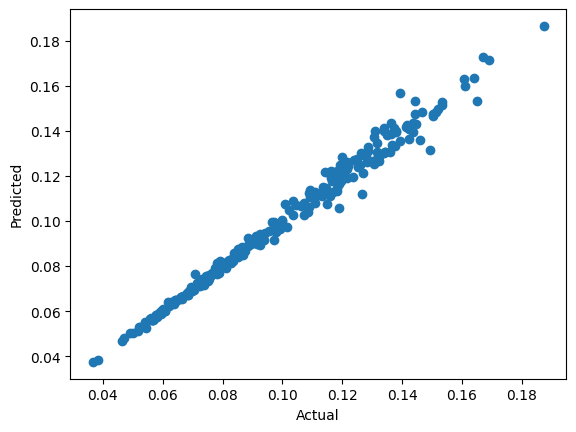

In [56]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='TOTAL POROSITY'>

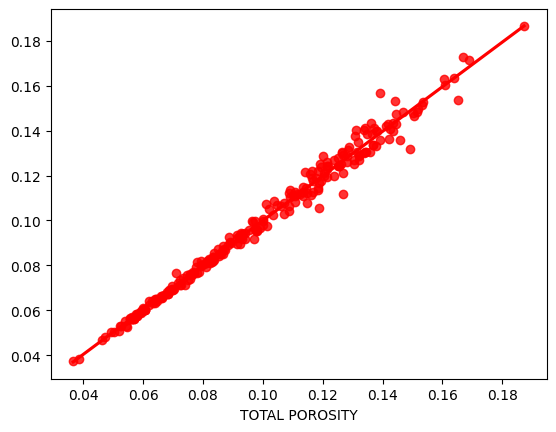

In [57]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red')

In [58]:
## Difference Between y_pred and y_test

In [60]:
pred_df=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred,"Difference":Y_test-y_pred})
pred_df

,Actual,Predicted,Difference
1236,0.1135,0.114948,-0.001448
76,0.1188,0.105644,0.013156
966,0.1133,0.112632,0.000668
433,0.0860,0.085091,0.000909
1114,0.1413,0.141996,-0.000696
...,...,...,...
798,0.0715,0.072356,-0.000856
170,0.0930,0.093069,-0.000069
458,0.0603,0.060057,0.000243
303,0.0545,0.052389,0.002111
